# CGM dataset  

Continuous Glucose Monitoring (CGM) measures glucose levels in a continuous manner.  <br>
This measure provides information on blood glucose control and glucose variability and could be used to monitor patients with diabetes.

Each 14-day continuous measure is termed a single CGM-connection.

Using the glucose measured in the CGM connection, we can calculate summary features (which was done using the iglu package) summarizing information on glucose control and variability. <br>
These were calculated for the entire CGM connection as well as for daily segments of the data.

The actual glucose measures are stored in multiple parquet files, each file holds the glucose measures for a single CGM connection. <br>

### Data availability:
The metadata and summary features are stored in 3 main statistics parquet files: `cgm.parquet`, `iglu.parquet`, `iglu_daily.parquet`.

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('cgm')
pl

PhenoLoader for cgm with
94 fields
4 tables: ['cgm', 'iglu', 'iglu_daily', 'age_sex']

# Data dictionary

In [4]:
pl.dict

field_string  \
tabular_field_name                                                                            
cgm_time_series                                                              CGM timeseries   
connection_id                                                                  ConnectionID   
collection_timestamp                                                   Collection timestamp   
cgm_connection_first_date                                                    CGM first date   
cgm_connection_last_date                                                      CGM last date   
cgm_device_type                                                             CGM Device type   
number_of_cgm_datapoints_lost_in_qc                               CGM datapoints lost in QC   
percentage_of_cgm_datapoints_lost_in_qc             Percentage of CGM datapoints lost in QC   
number_of_cgm_days_available_for_the_connection                Number of CGM days available   
number_of_cgm_datapoints_available_for_the_conn...       Number of CGM datapoints available   
timezone                                                                           Timezone   
cgm_1st_quartile                                                               1st quantile   
cgm_3rd_quartile                                                               3rd quantile   
cgm_above_140                                                                   % above 140   
cgm_above_180                                                                   % above 180   
cgm_above_250                                                                   % above 250   
cgm_below_54                                                                     % below 54   
cgm_below_70                                                                     % below 70   
cgm_in_range_63_140                                                       % in range 63-140   
cgm_in_range_70_180                                                       % in range 70-180   
cgm_adrr                                                                               ADRR   
cgm_auc                                                                                 AUC   
cgm_cogi                                                                               COGI   
cgm_conga                                                                             Conga   
cgm_cv                                                                                   CV   
cgm_cv_measures_mean                                                                 CVmean   
cgm_cv_measures_sd                                                                     CVsd   
cgm_ea1c                                                                               eA1C   
cgm_gmi                                                                                 GMI   
cgm_grade                                                                             GRADE   
cgm_grade_eugly                                                                 GRADE eugly   
cgm_grade_hyper                                                                 GRADE hyper   
cgm_grade_hypo                                                                   GRADE hypo   
cgm_gvp                                                                                 GVP   
cgm_hbgi                                                                               HBGI   
cgm_hyper_index                                                                 Hyper index   
cgm_hypo_index                                                                   Hypo index   
cgm_igc                                                                                 IGC   
cgm_iqr                                                                                 IQR   
cgm_j_index                                                                         J-index   
cgm_lbgi                                                                               LB

# Plot histogram and ecdf for cgm_ea1c at baseline visit


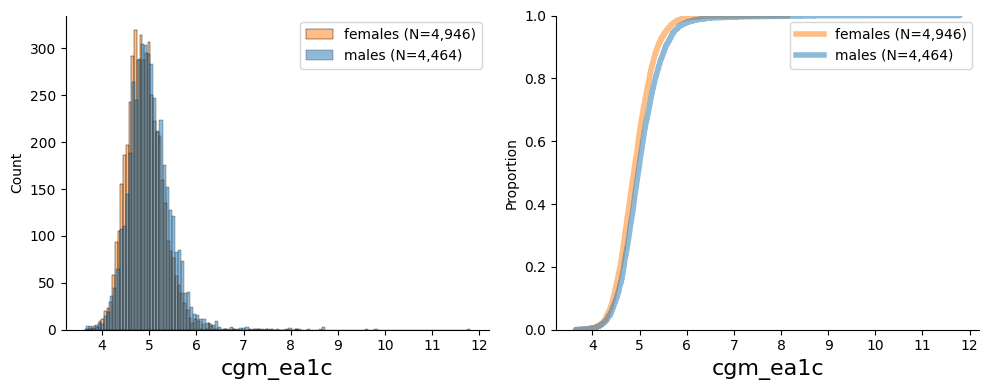

count      mean       std       min       25%       50%       75%  \
cgm_ea1c  9410.0  4.956665  0.438063  3.634348  4.675833  4.921743  5.196036   

                max  
cgm_ea1c  11.796603

In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "cgm_ea1c"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)